In [1]:
import pandas as pd

In [47]:
N_H=9
hit = pd.read_csv('/Users/jgdwyer/Dropbox/fun/jabo2019/baseball-H2H-AuctionValues/source_data/2018_team_totals_hitters.csv', index_col=0)
import scipy
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
hit_sgp = pd.DataFrame(columns=hit.columns, index=['slope','intercept'])
for col in hit.columns: 
    if col == 'ERA' or col == 'WHIP':
        ascending=False
    else:
        ascending=True
    slope, intercept, r_value, p_value, std_err = (
        scipy.stats.linregress(range(1, 15),hit[col].sort_values(ascending=ascending).reset_index(drop=True)))
    
    hit_sgp.loc['slope', col] = slope
    hit_sgp.loc['intercept', col] = intercept

In [48]:
import numpy as np

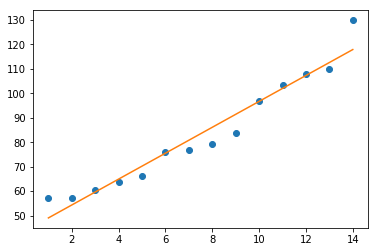

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
col='SB'
if col == 'ERA' or col == 'WHIP':
    ascending=False
else:
    ascending=True
plt.plot(np.arange(1, 15), hit[col].sort_values(ascending=ascending).reset_index(drop=True) ,marker='o', ls='')
plt.plot(np.arange(1,15), hit_sgp.loc['intercept', col] + np.arange(1,15)*hit_sgp.loc['slope', col])
# hit_sgp

In [51]:
hit_sgp

,BA,OBP,R,SB,RBI,HR,TB,SLG
slope,0.00272747,0.0029011,15.1437,5.28967,15.8182,5.43473,48.2598,0.00375385
intercept,0.241044,0.314385,604.722,43.7703,576.642,165.254,1883.15,0.420275


In [46]:
!ls

LICENSE.txt      Untitled1.ipynb  df.csv           source_data
README.md        baseball         output
Untitled.ipynb   cat.p            requirements.txt


In [45]:
hit_sgp.to_csv('./source_data/sgp_thresh_lastyear_values_H.csv', index=False)

In [85]:
sort_key = pd.Series(pos_offsets).sort_values()
sorted(['2B', 'U'], key=lambda x: sort_key[x])[0]

'2B'

In [72]:
pos_offsets = {'C': -6.495901095455834, 'SS': 0.4498213372240938, '2B': 0.3713500858289853, '3B': 2.3245547497915267, 'CF': 2.1983041054264563, 'LF': 1.302715110948761, 'RF': 1.920148110166175, '1B': 2.2798699732252903, 'U': 2.060807822722109}
sgp_pos_add_sort = sorted(pos_offsets.items(), key=lambda pos_offsets: pos_offsets[1], reverse=True) # largest to smallest
sgp_pos_add_sort

[('3B', 2.3245547497915267),
 ('1B', 2.2798699732252903),
 ('CF', 2.1983041054264563),
 ('U', 2.060807822722109),
 ('RF', 1.920148110166175),
 ('LF', 1.302715110948761),
 ('SS', 0.4498213372240938),
 ('2B', 0.3713500858289853),
 ('C', -6.495901095455834)]

In [39]:
a=pd.Series(index=['U', 'Uonly', '1B', 'RF', 'LF', 'CF', '3B', '2B', 'SS', 'C'])

In [53]:
a['3B'] = 1
a['U'] = 0
a['2B'] = 0
a['SS']= 0

In [57]:
b=list(a[a==a.min()].index)
print(b)

['U', '2B', 'SS']


In [58]:
['U', 'Uonly', '1B', 'RF', 'LF', 'CF', '3B', '2B', 'SS', 'C']
sort_order = {'C': 0, 'SS': 1, '2B': 2, '3B': 3, 'CF': 4, 'LF': 5, 'RF': 6, '1B': 7, 'Uonly': 8, 'U': 9}
# b.sort(key=lambda x: sort_order[x])
c=sorted(b, key=lambda x: sort_order[x])[0]
print(c)

SS


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113015da0>,
      dtype=object)

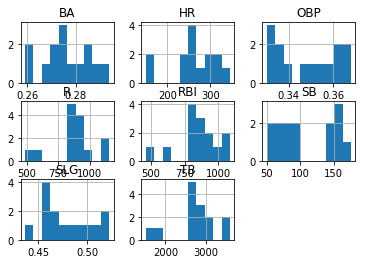

In [20]:
hit = pd.read_csv('/Users/jgdwyer/Dropbox/fun/jabo2018/source_data/2017_team_totals_hitters.csv', index_col=0)
%matplotlib inline
# hit['HR'].hist()
hit.hist()

In [94]:
df= pd.read_csv('df.csv', index_col=0)

In [97]:
cat_offsets=pd.read_pickle('./cat.p')

In [160]:
out2 = calcSGPHitters(out, cat_offsets)

In [158]:
cat_offsets, pos_offsets, star_thresh = calcPositionOffsets(cat_offsets, out)

                Name          Team    G   PA   AB    H  2B  3B  HR    R  \
0         Mike Trout        Angels  155  651  524  162  32   3  39  114   
1  Giancarlo Stanton       Yankees  150  630  541  155  25   1  57  111   
2       Bryce Harper     Nationals  147  616  505  152  30   1  37  100   
3      Nolan Arenado       Rockies  158  665  596  176  38   5  40  101   
4   Paul Goldschmidt  Diamondbacks  157  658  543  158  33   3  32   99   

     ...          wSLG      sAVG      sOBP      sSLG       sHR        sR  \
0    ...      0.016778  3.412995  6.111302  3.528794  2.570014  3.351517   
1    ...      0.022839  1.785050  2.749289  4.684093  4.999459  3.118869   
2    ...      0.013994  2.750869  4.934367  2.997909  2.300076  2.265825   
3    ...      0.014874  2.592297  1.580612  3.165719  2.704983  2.343375   
4    ...      0.009428  2.125324  4.456585  2.127488  1.625230  2.188276   

       sRBI      sSB       sTB        SGP  
0  2.339009  2.47920  2.283610  26.076441  
1  3

In [153]:
out2['SGP'][:14*9].sum()/91/8

1.0757106929660114

In [159]:
cat_offsets

,sAVG,sHR,sOBP,sR,sRBI,sSB,sSLG,sTB
0,-0.308248,0.487982,-1.033137,-0.966252,-0.353746,-0.719854,-0.33016,-1.065191


In [151]:
star_thresh

{'sAVG': -1.4210854715202004e-14,
 'sHR': 1.4210854715202004e-14,
 'sOBP': 1.4210854715202004e-14,
 'sR': -4.263256414560601e-14,
 'sRBI': -2.842170943040401e-14,
 'sSB': 0.0,
 'sSLG': 0.0,
 'sTB': -2.842170943040401e-14}

In [133]:
pos_offsets

{'1B': 2.0564904318475583,
 '2B': -0.0210954341750913,
 '3B': 1.163812060411236,
 'C': -6.073956854147543,
 'CF': 1.723150516397716,
 'LF': 1.6508726034466132,
 'RF': 1.6934956078129948,
 'SS': 0.036244637844293104,
 'U': 1.5351473423015418}

In [99]:

N_teams = 14
N_activehitters = 9
N_SP = 8
N_RP = 4
budget = 260
frac_hitter_budget = 0.5
frac_pitcher_budget = 1 - frac_hitter_budget

def load_sgp_thresh_last_year(players):
    """Get the SGP replacement level headers from the matlab script
    (Get_SGP_thresholds_from_lastyeardata.m)"""
    return pd.read_csv('./source_data/sgp_thresh_lastyear_values_' + players + '.csv')

def calcSGPHitters(df, cat_offsets):
    """Calculates SGP values for hitters"""
    # Get the SGP replacement level headers from the matlab script (Get_SGP_thresholds_from_lastyeardata.m)
    sgp = load_sgp_thresh_last_year('H')
    # Sort the data
    df = df.sort_values(by='wOBA', ascending=False)
    # Keep only the top players for calculating averages for rate categories
    top_hitters = df.head(N_activehitters * N_teams)
    # Calculate "wAVG"
    numer = (N_activehitters - 1) * top_hitters['H'].mean() + df['H']
    denom = (N_activehitters - 1) * top_hitters['AB'].mean() + df['AB']
    df['wAVG'] = numer/denom - top_hitters['AVG'].mean()
    # Calculate wOBA
    monbase = top_hitters['PA'].mean() * top_hitters['OBP'].mean()
    numer = (N_activehitters - 1) * monbase + df['H'] + df['BB'] + df['HBP']
    denom = (N_activehitters - 1) * top_hitters['PA'].mean() + df['PA']
    df['wOBP'] = numer/denom - top_hitters['OBP'].mean()
    # Calculate wSLG
    numer = (N_activehitters - 1) * top_hitters['TB'].mean() + df['TB']
    denom = (N_activehitters - 1) * top_hitters['AB'].mean() + df['AB']
    df['wSLG'] = numer/denom - top_hitters['SLG'].mean()
    # Now get the sgp by dividing by the values calculated from last year's totals
    for cat in ['AVG', 'OBP', 'SLG']:
        df['s' + cat] = df['w' + cat] / sgp[cat][0] - cat_offsets['s' + cat][0]
    for cat in ['HR', 'R', 'RBI', 'SB', 'TB']:
        df['s' + cat] = (df[cat] - sgp[cat][1]) / sgp[cat][0] - cat_offsets['s' + cat][0]
    # Sum up all of these entries to get the total SGP
    df['SGP'] = df[['sAVG', 'sOBP', 'sSLG', 'sHR',
                    'sR', 'sRBI', 'sSB', 'sTB']].sum(axis=1)
    # Now sort by total SGP descending
    df = df.sort_values(by='SGP', ascending=False)
    return df.reset_index(drop=True)

In [155]:
def calcPositionOffsets(cat_offsets, df):
    """Calculate the position offset values.
    Go through all hitters in order of SGP and assign them positions. It doesn't
    actually matter what list a player is assigned to. The point is to get
    replacement values"""
    # Initiailize each list by putting in the best hitter (will remove later)
    meta_ranked = [m: pd.DataFrame(columns=df.columns) for m in ['U', 'Uonly', '1B', 'RF', 'LF', 'CF', '3B', '2B', 'SS', 'C']]
    #     meta_ranked = dict()
#     for m in ['U', 'Uonly', '1B', 'RF', 'LF', 'CF', '3B', '2B', 'SS', 'C']:
#         meta_ranked[m] = df.head(1)
    print(df.head())
    for _, row in df.iterrows():
        # Get the sgp of the player in this row
        sgp = row['SGP']
        # now get the rank of the available positions
        posrank = dict()
        # Loop over all positions this player is eligible at
        # Get the SGP of all players at each eligible position
        for pos in row['position'].split(','):
            sgpofcolumn = meta_ranked[pos]['SGP'].get_values()
            # For each eligible position, find out how many players are better (by SGP)
            posrank[pos] = get_rank(sgpofcolumn, sgp)
        # Get which position the player would be the next best at by finding the
        # one with the least number of better players at it
        highest = min(posrank.values())
        bestposits = [k for k, v in posrank.items() if v == highest]
        # In the case of ties, go down the defensive spectrum
        # Values overwrite each other so the toughest to fill position is left at the end
        for pp in ['U', 'Uonly', '1B', 'RF', 'LF', 'CF', '3B', '2B', 'SS', 'C']:
            if pp in bestposits:
                bestpos = pp
        # Finally add the row to the end of the correct dataframe
        meta_ranked[bestpos] = meta_ranked[bestpos].append(row, ignore_index='True')
    # Now remove the initialized value of the best hitter in each list
#     for m in meta_ranked:
#         meta_ranked[m] = meta_ranked[m].drop(0)
#         meta_ranked[m] = meta_ranked[m].reset_index(drop=True)
    sgp = load_sgp_thresh_last_year('H')
    # also need to account for the bench hitters. assume every team carries 3.
    # then 42 extra hitters. more than 4 teams worth
    star_thresh = dict()
    # We need to normalize SGP so that the total available SGP of all hitters is
    # the number of points that can be gained (i.e., for each category, there are
    # 14 teams, so there are 13 points to be gained in each for each)
    sgp_new = dict()
    for sgpcat in ['sAVG', 'sOBP', 'sSLG', 'sHR', 'sR', 'sRBI', 'sSB', 'sTB']:
        # loop over hitting categories
        star = 0
        for pos in ['U', '1B', 'RF', 'LF', 'CF', '3B', '2B', 'SS', 'C']:  # NO UONLY
            #Load the sum of SGP for each category at each position
            star += meta_ranked[pos][sgpcat][:N_teams].sum()
        # We're aiming to minimize this total in order that the sum of points of
        # all the owned players represents the correct
        # Use sum(i=1:N,i)=(N+1)N/2
        # Total SGP available: Team A can gain 13pnts, Team B can gain 12pnts, etc.
        # total number of sgp that can be gained by all teams..each category should have the same # ofthese
        # N_teams not N_teams+4
        star_thresh[sgpcat] = star - N_teams*(N_teams-1)/2
        # N_teams-1    #N_teams*(N_teams-1)/2
        # This is the offset threshold that gets added on so that the total number of category points are right
        # This gets added in to the old values
        # Divide the difference by the total number of active players since all  will be contributing to the category
        cat_offsets[sgpcat] += star_thresh[sgpcat] / (N_teams * N_activehitters)
    # Get the positional difference by looking at the value of the last player
    pos_offsets = dict()
    for pos in ['U', '1B', 'RF', 'LF', 'CF', '3B', '2B','SS', 'C']:
        # TODO: These don't seem to be normalized correctly
        pos_offsets[pos] = meta_ranked[pos]['SGP'][N_teams-1]
        # pos_offsets[pos] = meta_ranked[pos]['SGP'][:(N_teams-1)].mean()
    return cat_offsets, pos_offsets, star_thresh


def get_rank(listo, sgp):
    """returns the index of the first item in a sorted list (must be descending)
     whose value is less than an input value"""
    # Get the first item in the list whose value falls under the entered one
    try:
        index = next(index for index, value in enumerate(listo) if value < sgp)
    # If we reach the end of the list use the last entry as the index
    except StopIteration:
        index = len(listo)
    # If the largest value in the list is the first one below the input value,
    # return an empty string. This is meant for the case in which the player
    # is the best at their position and accounts for players being placed at
    # U when they should really go to another list
    if index == 0:
        index = ''
    return index

SyntaxError: invalid syntax (<ipython-input-155-adf398700246>, line 7)